In [1]:
# sadly you cant install this thing with conda
!python3.9 -m pip install matplotlib-label-lines

In [2]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
from labellines import labelLine, labelLines
%matplotlib inline

In [3]:
small=pd.read_csv("../data/hrr_small_count.csv")
small = small[["probe_id","memory_length","memorized_pairs","correct_revive"]]
small

,probe_id,memory_length,memorized_pairs,correct_revive
0,0,10,1,True
1,0,10,1,True
2,1,10,1,True
3,1,10,1,True
4,2,10,1,False
...,...,...,...,...
4762715,357,340,14,True
4762716,357,340,14,True
4762717,357,340,14,True
4762718,357,340,14,True


# Results - small

In [4]:
correct_revive_small = small.groupby(['memory_length',"memorized_pairs"])
correct_revive_small = correct_revive_small['correct_revive'].value_counts(normalize=True).to_frame()
correct_revive_small

correct_revive
memory_length memorized_pairs correct_revive                
10            1               True                  0.945700
                              False                 0.054300
              2               True                  0.779100
                              False                 0.220900
              3               True                  0.594481
...                                                      ...
340           12              False                 0.003797
              13              True                  0.993506
                              False                 0.006494
              14              True                  0.988428
                              False                 0.011572

[860 rows x 1 columns]

In [5]:
correct_recall_per_probe = small[['memory_length', "memorized_pairs", 'correct_revive']]
correct_recall_per_probe = correct_recall_per_probe.groupby(['memory_length', "memorized_pairs"])
correct_recall_per_probe = correct_recall_per_probe['correct_revive'].value_counts(normalize=True)
correct_recall_per_probe.name = 'correct_prob'
correct_recall_per_probe = correct_recall_per_probe.to_frame().reset_index()
correct_recall_per_probe = correct_recall_per_probe[correct_recall_per_probe['correct_revive']==True].drop("correct_revive", axis=1)
correct_recall_per_probe

,memory_length,memorized_pairs,correct_prob
0,10,1,0.945700
2,10,2,0.779100
4,10,3,0.594481
7,10,4,0.477000
9,10,5,0.391800
...,...,...,...
850,340,10,0.999200
852,340,11,0.997802
854,340,12,0.996203
856,340,13,0.993506


Text(0.5, 1.0, 'How memory length influence abilty to recall')

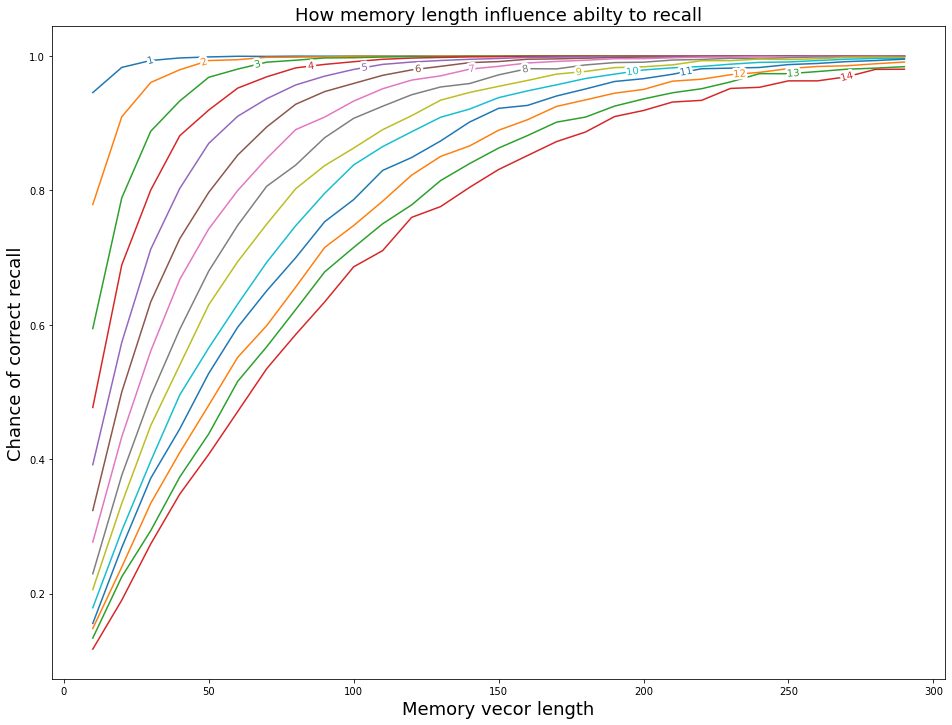

In [6]:
plt.figure(figsize=(16, 12))
correct_recall_per_probe = correct_recall_per_probe.loc[(correct_recall_per_probe['memory_length']<300)]
for name, group in correct_recall_per_probe.groupby("memorized_pairs"):
    plt.plot(group['memory_length'],group['correct_prob'], label=name)
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlabel("Memory vecor length",fontsize=18)
# plt.xscale('log')
plt.ylabel("Chance of correct recall",fontsize=18)
plt.title("How memory length influence abilty to recall", fontsize=18)

In [14]:
big =pd.read_csv("../data/hrr_big_count.csv")
big = big[["probe_id","memory_length","memorized_pairs","correct_revive"]]
big.describe()

,probe_id,memory_length,memorized_pairs
count,98000.000000,98000.000000,98000.000000
mean,0.102041,9010.000000,593.877551
std,0.363932,5744.591956,250.232324
min,0.000000,10.000000,100.000000
25%,0.000000,4010.000000,400.000000
50%,0.000000,9010.000000,600.000000
75%,0.000000,14010.000000,800.000000
max,2.000000,18010.000000,900.000000


In [15]:
correct_recall_per_probe = big[['memory_length', "memorized_pairs", 'correct_revive']]
correct_recall_per_probe = correct_recall_per_probe.groupby(['memory_length', "memorized_pairs"])
correct_recall_per_probe = correct_recall_per_probe['correct_revive'].value_counts(normalize=True)
correct_recall_per_probe.name = 'correct_prob'
correct_recall_per_probe = correct_recall_per_probe.to_frame().reset_index()
correct_recall_per_probe = correct_recall_per_probe[correct_recall_per_probe['correct_revive']==True].drop("correct_revive", axis=1)
correct_recall_per_probe

,memory_length,memorized_pairs,correct_prob
1,10,100,0.006667
3,10,200,0.005000
5,10,300,0.003333
7,10,400,0.002500
9,10,500,0.001000
...,...,...,...
152,18010,500,0.996000
154,18010,600,0.980833
156,18010,700,0.943571
158,18010,800,0.890000


In [ ]:
plt.figure(figsize=(16, 12))
for name, group in correct_recall_per_probe.groupby("memorized_pairs"):
    plt.plot(group['memory_length'],group['correct_prob'], label=name)
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlabel("Memory vecor length",fontsize=18)
# plt.xscale('log')
plt.ylabel("Chance of correct recall",fontsize=18)
plt.title("How memory length influence abilty to recall", fontsize=18)

Text(0.5, 1.0, 'How memory length influence abilty to recall')